## Autocorrelation function vs power spectrum

Following the autocorrelation theorem presented in Fig.1 of Crovisier & Dickey 1983
http://adsabs.harvard.edu/abs/1983A%26A...122..282C

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from noisegen import fbm2d
from powspec import powspec
from scipy.signal import correlate2d

Creation of an exponentiated fractional Brownian motion map with a power law of 3.6

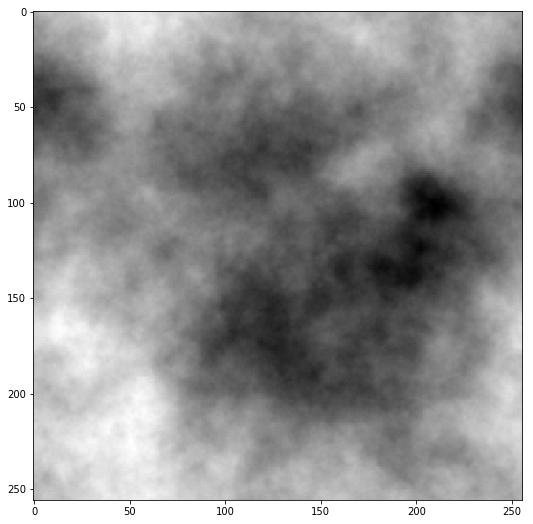

In [3]:
N = 256
efbm = fbm2d(-3.6,N,N)

figure(figsize(9,9))
imshow(efbm,cmap='gray')

Plot its power spectrum

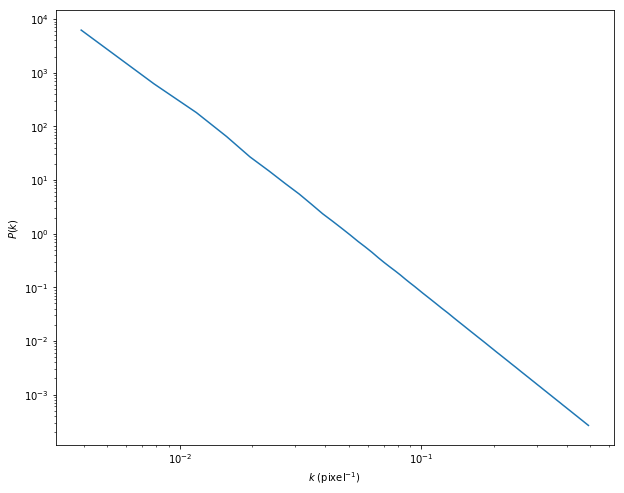

In [4]:
tab_k,spec_k = powspec(efbm, reso=1.0)

figure(figsize=(10,8))
plot(tab_k, spec_k)
xlabel(r'$k$ (pixel$^{-1}$)')
ylabel(r'$P(k)$')
xscale('log')
yscale('log')

Inverse Fourier transform of the power spectrum, which should correspond to the autocorrelation function

(0, 128.0)

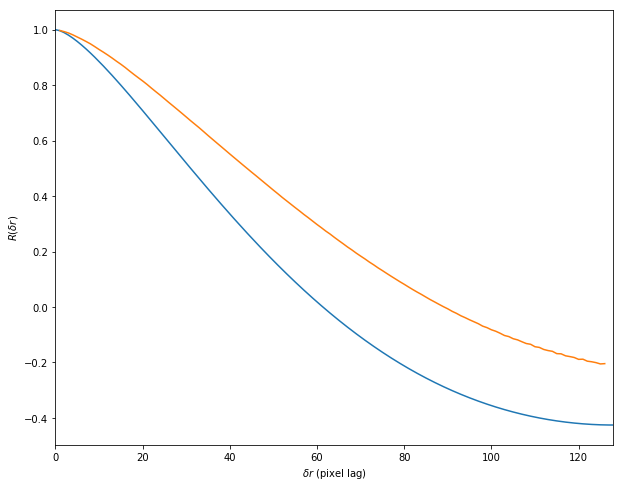

In [16]:
FTefbm=np.fft.fft2(efbm) / np.float(N)
ps2D = np.abs( FTefbm )**2
ACefbm = np.fft.ifft2(ps2D).real

lag,Rr = powspec(efbm, reso=1.0, autocorr= True)

figure(figsize=(10,8))
plot(np.diag(ACefbm))
plot(lag,Rr)
xlabel(r'$\delta r$ (pixel lag)')
ylabel(r'$R(\delta r)$')
xlim((0,N/2.))

Now if we calculate the autocorrelation function of the efBm.

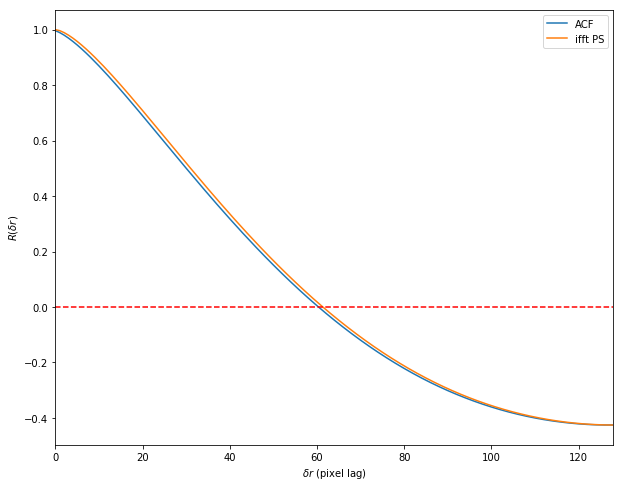

In [6]:
Sr = correlate2d(efbm,efbm,mode='full',boundary='wrap')

spec_r2 = np.diag(Sr)/np.float(N)**2.

figure(figsize=(10,8))
plot(spec_r2,label='ACF')
plot(np.diag(ACefbm),label='ifft PS')
plot([0,N/2],[0,0],'--',color='red')
xlabel(r'$\delta r$ (pixel lag)')
ylabel(r'$R(\delta r)$')
xlim((0,N/2.))
#yscale('log')
plt.legend()

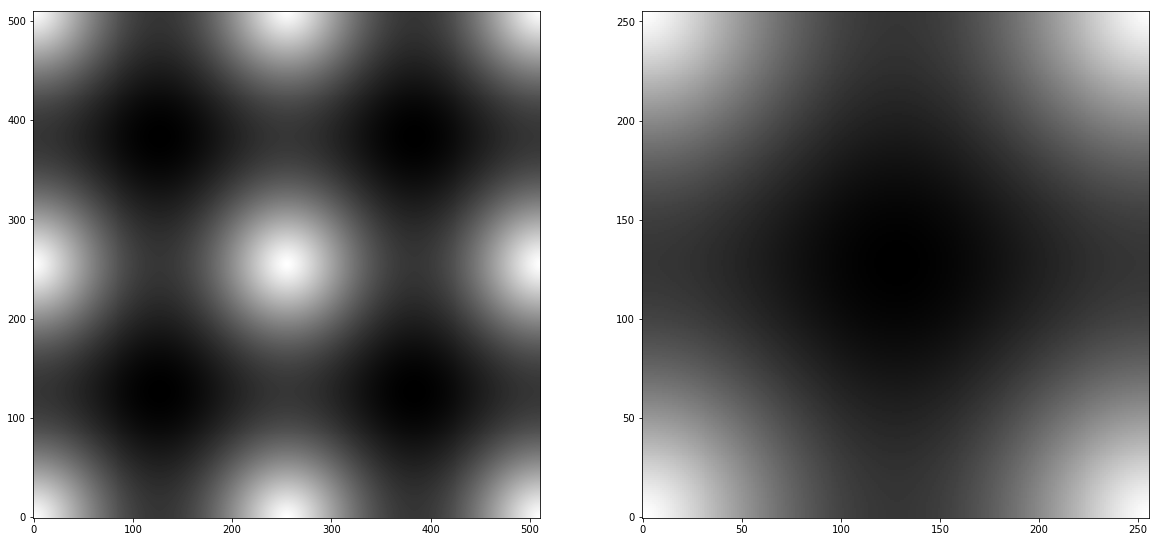

In [7]:
figure(figsize(20,10))
plt.subplot(1,2,1)
imshow(Sr,cmap='gray',origin='bottom')
plt.subplot(1,2,2)
imshow(ACefbm,cmap='gray',origin='bottom')

## Interprétation de la matrice d'autocorrelation

En supposant que l'équation de l'autocorrelation 2D de scipy correspond bien a

$$R(j,k)=\sum_{n,q} \frac{x_{n,q}x_{n-j,q-k}}{\sigma_x^2},$$

alors un spectre d'autocorrélation 1D pourrait être estimer pour toutes les distances $r=\sqrt{j^2+k^2}$.